In [2]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is NOT AVAILABLE


# Download the IMDB dataset from Tensorflow

In [4]:
(train_data, val_data), test_data = tfds.load(name='imdb_reviews',
                                           data_dir = '/Users/darragh/Python/Python 2020 - 2021/Github/Technique Thursday/Tensorflow Text Classification/TF Hub Sentiment - IMDb/',
                                           split=(tfds.Split.TRAIN.subsplit([6,4]), tfds.Split.TEST),
                                           as_supervised=True,
                                           shuffle_files=True )


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/darragh/Python/Python 2020 - 2021/Github/Technique Thursday/Tensorflow Text Classification/TF Hub Sentiment - IMDb/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


# Explore The Data

In [5]:
# Train Data
train_text_batch, train_labels_batch = next(iter(train_data.batch(1)))
train_text_batch, train_labels_batch 

(<tf.Tensor: shape=(1,), dtype=string, numpy=
 array([b'There is no way to avoid a comparison between The Cat in the Hat and The Grinch Who Stole Christmas, so let\'s get that part out of the way. First of all, let me start by saying that I think Grinch was an underrated and unappreciated film. Cat was... well, just awful.<br /><br />Jim Carey was cast because he is a brilliant physical comedian, and fearlessly commits to over the top, outrageous characters. Mike Myers fell back on his old bag of tricks.<br /><br />Why, why, why Mike Myers?? The kids could care less, and the Austin Powers demographic isn\'t going to spy this film. So, what was the studio thinking?<br /><br />The Cat was also apparently related to Linda Richmond. Can we talk? Why a New York Accent? Not entirely consistent with anything Dr. Seuss has ever written. Myers was even allowed to sneak in his Scottish shtick. I wonder how many different voices the director and the studio tried to edit out of before they just ga

In [6]:
# Test Data
test_text_batch, test_label_batch = next(iter(test_data.batch(1)))
test_text_batch, test_label_batch

(<tf.Tensor: shape=(1,), dtype=string, numpy=
 array([b"I never saw any of The League's work until early last year - although when channel hopping one night I caught the end of one the series three episodes. But last winter I fell in love with the show and its dark, eccentric and sometimes downright sinister characters. So when I learnt they had made a film in which the show's lovable creators met their own characters, I couldn't order the DVD fast enough and near on tore it from my postman's hands when he delivered it. I was so excited to see what the Gents had done and how they'd done it.<br /><br />And it was excellent! From the beginning where Jeremy (Michael Sheen) is terrorised by Edward, Tubbs and Papa (Dyson, why didn't you play yourself? He's perfectly capable as viewers of the infamous Highgate House of Horrors know!), to Bernice berating yet another one of her flock, to Geoff, Herr Lipp and Hilary discovering that THEY are characters, which is a great scene. The scenes set i

# Build the model
Adding pretrained embedding layer as preprocessing step 

In [7]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"

hub_layer = hub.KerasLayer(embedding, input_shape=[],
                          dtype=tf.string, trainable=True)

In [8]:
# Build the full model including the embedding layer
model = tf.keras.Sequential()
model.add(hub_layer) # splits the sentence into tokens, embeds each token and then combines the embedding
model.add(tf.keras.layers.Dense(16, activation='relu')) #fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units
model.add(tf.keras.layers.Dense(1)) # Densely connected single output node

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile The Model
model.compile(optimizer ='adam', 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), # measures the "distance" between between the ground-truth distribution and the predictions.
    metrics=['accuracy'])


In [10]:
# Train the model

history = model.fit(train_data.shuffle(10000).batch(512), # Shuffle and train in mini-batches of 512 samples
                    epochs =10, 
                    validation_data = val_data.batch(512), # mini-batches of 512 samples
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 31s 935ms/step - loss: 2.3104 - accuracy: 0.5219 - val_loss: 0.8947 - val_accuracy: 0.5735
Epoch 2/10
30/30 [==============================] - 24s 790ms/step - loss: 0.7718 - accuracy: 0.6092 - val_loss: 0.6977 - val_accuracy: 0.6294
Epoch 3/10
30/30 [==============================] - 20s 639ms/step - loss: 0.6140 - accuracy: 0.6885 - val_loss: 0.6300 - val_accuracy: 0.6886
Epoch 4/10
30/30 [==============================] - 19s 632ms/step - loss: 0.5091 - accuracy: 0.7658 - val_loss: 0.5733 - val_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 19s 624ms/step - loss: 0.4181 - accuracy: 0.8274 - val_loss: 0.5317 - val_accuracy: 0.7888
Epoch 6/10
30/30 [==============================] - 18s 596ms/step - loss: 0.3368 - accuracy: 0.8796 - val_loss: 0.5046 - val_accuracy: 0.8120
Epoch 7/10
30/30 [==============================] - 18s 598ms/step - loss: 0.2701 - accuracy: 0.9118 - val_loss: 0.4997 - val_accuracy: 0.8299

# Evaluate the model

In [11]:
# results = model.evaluate(test_data.batch(512), verbose=2)

# for name, value in zip(model.metrics_names, results):
#     print("%s: %.3f" % (name, value))

loss, accuracy = model.evaluate(test_data.batch(512))
print("loss",loss)
print('accuracy', accuracy)

49/49 [==============================] - 2s 34ms/step - loss: 0.5876 - accuracy: 0.8297
loss 0.587593138217926
accuracy 0.8296800255775452


# Plot the results

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

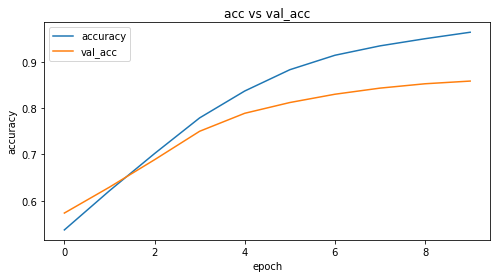

In [13]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8,4))
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('acc vs val_acc')
plt.show()

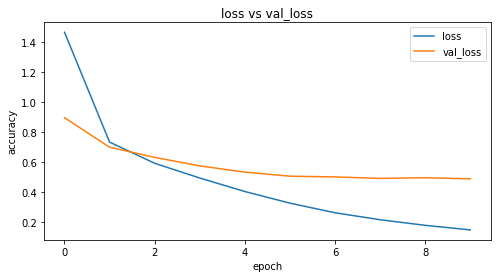

In [14]:
plt.figure(figsize=(8,4))
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('loss vs val_loss')
plt.show()

# Inference on new data

In [22]:
model.predict([['this movie is so amazing'],
               ['this movies was really terrible, I didnt enjoy it'],
               ['the story was really terrible but the acting was actually amazing good I give it 3 out of 5']])

array([[0.56156343],
       [0.10629544],
       [0.28125244]], dtype=float32)